# Group Meeting 1
This group meeting introduces the basic ideas of Information Theory in the context of complex systems, as well as reviewing some basic properties of probabilities.

### Readings
Chapter 1 of Cover & Thomas 

http://staff.ustc.edu.cn/~cgong821/Wiley.Interscience.Elements.of.Information.Theory.Jul.2006.eBook-DDU.pdf

Chapters 1 and 2 of Bossomaier et al.

https://link.springer.com/book/10.1007/978-3-319-43222-9

### Data
The data for this Notebook is fMRI data from the Human Connectome Project, preprocessed by Joshua Faskowitz. We don't really care about the neural interpretation, it's just a source of continuous time-series data we can binarize and analyze. 

http://www.humanconnectomeproject.org/

In general, fMRI data is not great for IT analysis - it is continuous, and methods of discretizing it are often ad-hoc and in my (Thomas') opinion, not well-principled. If you want to talk about how we can make it a bit more principled, that can be a topic for another day (see the section of entropy estimators in Lizier et al.,)

### Basic Notation / Terms
Specific instances of $X$ are usually denoted with lower-case font (i.e. $x$), and has some specific probability that ranges from $[0,1]$ (inclusive). Probabilities are usually denoted with upper-case $P()$. It is important to remember that *specific outcomes have defined probabilities, not the whole variable itself.* For instance, if to formally describe a fair coin flip, where $P(Heads) = P(Tails) = 1/2$:

\begin{equation}
P(X = x) = 1/2
\end{equation}

We read this as *"the probability that our random variable $X$ is in state $x$ is $1/2$."* Again, note that $1/2$ is associated with $x$ not $X$. In the future, we will shorten the notation by writing $P(X=x)$ as just $P(x)$, but for the rest of this Notebook, I will write the full, formal expression out, just to really drive home what we're seeing. You will often sometimes see $P_X(x)$, which is the the same thing.

In contrast, when we write just $P(X)$, we are referring usually to the entire probability distribution of all possible $x$, without being interested in the specific probabilities of any one outcome.

If you have two variables (e.g. two points), you can look at the *joint probabilities*, typically denoted $P(X=x, Y=y)$ or $P_{XY}(x, y)$. If you don't mind loosing information about $X$ and $Y$, joint probabilities can also be re-cast a single probabilites of a higher order: $P(X=x,Y=y) := P(Q=q)$

##### Support Sets
The "support" of $X$ is the set of all possible values of $X$ that can occur (i.e. for which the probability is greater than 0). It is often denoted with the "fancy" font. In this case, the support of $X$ is $\mathcal{X}$, and $\mathcal{X} = \{Heads,Tails\}$. Formally, we would write something like:

\begin{equation}
\mathcal{X} = \{x | P(X = x) > 0\}
\end{equation} 

which we would read as *"the support set of our random variable $X$ is the set of all possible states it can take with a probability greater than 0."* For instance, if $X$ is a fair coin with two outcomes ($Heads$ or $Tails$), the probability of ever getting $Pineapple$ is $0$ and so we say that $Pineapple \not\in \mathcal{X}$ ($\in$ is read as "is an element of" and $\not\in$ is read as "is not an element of". If you're not familiar with this notation, it's called "Set Builder Notation" and it is extremely useful to get comfortable with - it is also how you do efficient list, set, and dictionary comprehensions in Python).

### How Do Probabilities Behave?

##### Distributions

We're all likely familiar with probability distributions, but it's worth revisiting breifly. Every element of the support set has a probability assocaited with it, and these have *got* to sum to one. Formally:

\begin{equation}
\sum_{x\in\mathcal{X}}P(X=x) = 1
\end{equation}

For now we're only interested in discrete probability distributions (i.e. coin flips, die rolls, discrete signals, but of course probability distributions can be defined for continuous variables as well, and the same normalizing rule holds, just replace the summation with an integral over $dx$.

For a joint probability distribution, the same summation rules hold, only it's over all $x\in \mathcal{X}$ and $y\in \mathcal{Y}$:

\begin{equation}
\sum_{x\in \mathcal{X}}\sum_{y\in \mathcal{Y}}P(X=x, Y=y) = 1
\end{equation}

For two variables $X$ and $Y$, if they are *independent*, then the state of $X$ has no impact on the state of $Y$. Consequently, all their joint probabilities are equivalant to the product of their marginal probabilities. If we consider two fair, independent coins, the probability that they both come up $Heads$ $(1/4)$ is equal to the product of the probabilities of getting a head from each alone $(1/2 \times 1/2)$.

\begin{equation}
P(X=x,Y=y) = P(X=x)\times P(Y=y)
\end{equation}

*This is NOT a universal identitiy. In MOST complex systems, two variables will NOT be statistically independent and so the joint probability cannot be assumed to just be the product of the marginals, it must be observed directly*

Given a table of joint probabilities of $P(X,Y)$, you can calculate the *marginal probabilities* by simply summing the rows or columns, respectively. This gives you $P(X)$ and $P(Y)$ by themselves.

##### Expected Value of a Distribution

Imagine we play a game where we toss a fair coin. If it comes up $Heads$, I give you $\$10$, where if it comes up $Tails$, you give me $\$7$ (I would be very stupid to play this game). If we were to play this game for a long time (thousands of rounds), on average, how much money would you expect to make (or loose) *for each toss of the coin.* Note that we are not asking "how much money would you make/lose" total, but rather, "*on average*, how much money flows from me to you for each-coin flip?"

Note that this only makes sense when the outcomes have some quantitative interpretation: if we have no money and only record $Heads$ and $Tails$, the question of what the expected value is makes no sense.

Expected value is typically noted with the $E[P(X)]$ operator, and adds in another function: the value function. If $P(X=x)$ is the probability of $X$ taking on the specific state $x$, then $f(X=x)$ is the payoff you get when $X$ takes on the specific state $x$. The expected value is then given by:

\begin{equation}
E[P(X)] = \sum_{x \in \mathcal{X}}P(X=x)\times f(X=x)
\end{equation}

For our toy example:

\begin{equation}
E[P(X)] = (1/2\times\$10) + (1/2\times-\$7) = \$1.50
\end{equation}

In the long term, you'll make $\approx\$1.50$ per term. Not a bad game (from your perspective).

If $P(X=x_1) = P(X=x_2) = P(X=x_3) = ... P(X=x_{|\mathcal{X}|})$, then $E[P(X)]$ is just the average of the codomain of $f(X)$.

$\frac{-7+10}{2} = 1.5$

### Surprise

What is "surprise?" This is first serious chunk of Information Theory we'll look at. At it's most basic level, "surprise" measures exactly that: how surprised are you to see our random variable in a particular state. We can think of some basic properties we might want it to have: 
- It should be 0 if you knew what the state would be with total certainty. 
- It should be inversely related to probability (i.e. the less probable a result is, the more surprising it is).
- It would be nice if it behaved in reasonable ways (not blowing up rapidly to $\infty$ or shrinking down to something like $10^{-50}$). 

The natural candidate of $S(X=x)$ is simply $\frac{1}{P(X=x)}$, but that has some problems, namely non-additivity. 

We would like it if, for two independent events, the surprise at seeing both together was equal to the sum of their individual surprises. 

\begin{equation}
S(X=x, Y=y) = S(X=x)+S(Y=y)
\end{equation}

The intuition here is that, if I flip two coins at the same time and get $Heads, Heads$, that should not be any more surprising than if I flip one coin and get $Heads$ and then flip the same coin again and get $Heads$ again.

Recall that, for independent events 

\begin{equation}
P(X=x, Y=y) = P(X=x) \times P(Y=y)
\end{equation}

This presents a problem for our putative $S$ function. Imagine I flip a fair coin twice and get $[Heads, Heads]$. The probability of that is $1/4$. Now, I'll flip it two more times and, lo-and-behold, I get $[Heads,Heads]$ again (which, again, has probability of $1/4$). For both, if we define $S = 1/P$, then for each, my surprise is 4 (don't worry about the units), and so we would expect that the total surprise would be 8. Unfortunately, this doesn't line up with what we know about joint probabilities: the probability of getting 4 $H$ from a fair coin *is not* $1/8$, it's $1/16$, which has a surprise of 16. 

Our putative surprise function of $S=1/P$ doesn't satisfy our intuition that getting 4 $Heads$ in a row is twice as surprising as getting 2 $Heads$ in a row. We need a better surprise function. Conviently, Claude Shannon provided one for us, which is *very* similar to the one we just worked through. He defined:

\begin{equation}
S(X=x) = \log_2\big(\frac{1}{P(X=x)}\big)
\end{equation}

If we work through the same contrived example, we get:

\begin{equation}
\log_2(\frac{1}{1/16}) = \log_2(\frac{1}{1/4}) + \log_2(\frac{1}{1/4}) = 4
\end{equation}

Here's a general proof that the formula $\log(\frac{1}{P(X=x)})$ satisfies our additivity criteria for independent events. I'm going through the algebra in more detail than you usually see, in case we have readers who don't quite remember their rules for logarithms.

\begin{eqnarray}
S_{XY}(x,y) &=& \log\big(\frac{1}{P_{XY}(x,y)}\big) \\
&=& -\log(P_{XY}(x,y)) \\
&=& -\log(P_X(x)P_Y(y)) \\
&=& -1\times(\log(P_X(x)) + \log(P_Y(y))) \\
&=& -\log(P_X(x)) - \log(P_Y(y))) \\
&=& \log\big(\frac{1}{P_X(x)}\big) + \log\big(\frac{1}{P_Y(y)}\big) 
\end{eqnarray}

If you're looking at the above algebraic derivation thinking "holy crap I have no idea what's happenign here", go back and review the rules for logarithms. 

Some quick plots so what we can see what the surprise function looks like. Notice that, in addition to satisfying the additivity criteria, the log-based surprise also remains (reasonably) large even as the probability goes to 1, which makes computation much easier.


Text(0,0.5,'log(1/P(x))')

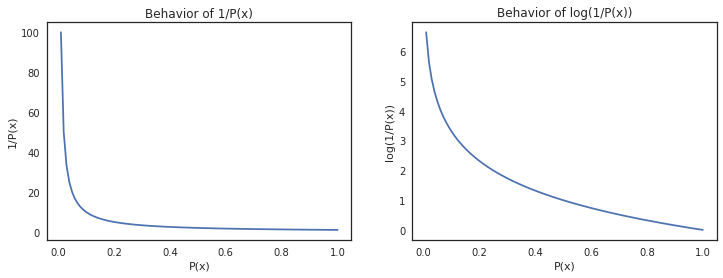

In [100]:
Px = np.linspace(0,1,101)[1:] #Here I am defining an interval of probability values from 0 to 1.
inv_Px = 1/Px #This is our putative surprise function. 
#I'm leaving out P(x) = 0, since it will diverge to infinity.
#and also anything with P(x) = 0 isn't in our support set. 

#We can get a sense of how it behaves by plotting it. 

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Behavior of 1/P(x)")
plt.plot(Px, inv_Px)
plt.xlabel("P(x)")
plt.ylabel("1/P(x)")

plt.subplot(1,2,2)
plt.title("Behavior of log(1/P(x))")
plt.plot(Px, np.log2(inv_Px))
plt.xlabel("P(x)")
plt.ylabel("log(1/P(x))")

## Enough Formal Stuff: Let's Look at Some Data

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns #Seaborn is a wrapper for matplotlib - it makes everything prettier.
sns.set(style="white")
from copy import deepcopy
from collections import Counter
from scipy.stats import zscore

#To save disk space, I've saved the HCP data as a compressed .npz array.
#You can load it into the workspace with np.load(), although it cannot be directly accessed. 
data = np.load("data/HCP_BOLD.npz")
#The .npz object behaves like a dictionary. To uncompress it, you call it with the relevant key.
print("Keys:", list(data.keys()))

Keys: ['signal']


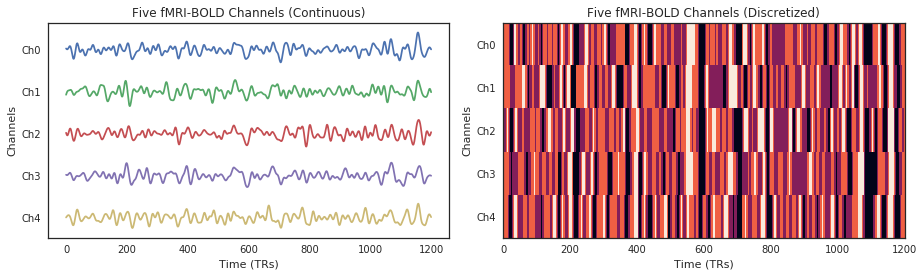

In [4]:
bold = zscore(data["signal"], axis=1) #Z-scored for data-hygiene reasons.
#For those that don't know: to z-score data is to subtract the mean, and divide by the standard deviation. 
#This results in data distributed around 0 w/ unit deviation. It does not make things Gaussian, but makes 
#things generally nicer.

plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
for i in range(5):
    plt.plot(bold[i]-(10*i))
plt.xlabel("Time (TRs)")
plt.ylabel("Channels")
plt.yticks([0,-10,-20,-30,-40], ["Ch0", "Ch1", "Ch2", "Ch3", "Ch4"])
plt.title("Five fMRI-BOLD Channels (Continuous)")

#We can binzarize this data by putting every value X(t) > 0 to 1 and every value X(t) < 0 to 0.
#Recall that, for each time-series, we have forced the mean to be 0. Note that this makes assumptions about 
#stationarity that may not be appropraite if we actually cared about what the data really was.

discrete = deepcopy(bold) #This is a handy utility function, for Python-people whow haven't seen it before. 
discrete[discrete > 0] = 1 #Numpy indexing at work.
discrete[discrete < 0] = 0
discrete = discrete.astype("int16") #Use small integers if you can get away with it. Easier on RAM. 

#Uncomment below to try a different discretezation schema - in this case, instead of binary, it does 
#4 states, based on +/- 0 and then +/- 1 standard deviation. 

discrete = deepcopy(bold)
discrete = np.digitize(discrete, [-np.inf,-1, 0, 1,np.inf]) - 1

plt.subplot(1,2,2)
plt.imshow(discrete[:5, :], aspect="auto")
plt.xlabel("Time (TRs)")
plt.ylabel("Channels")
plt.yticks([0,1,2,3,4], ["Ch0", "Ch1", "Ch2", "Ch3", "Ch4"])
plt.title("Five fMRI-BOLD Channels (Discretized)")
plt.tight_layout()

In [5]:
#Let's take just one channel of interest:
ch0 = discrete[0]

#It's support set is just all unique values that it takes on:
ss = {x for x in ch0} #Python set objects make this very easy.
print("Support Set for Ch. 0:", ss)

#We can estimate the relative probabilities of every element of the support set by counting how many times 
#each one appears. 
#The Counter() function from the collections module does this automatically for us. 
C0 = Counter(ch0)
print("Counts:", C0)

#By dividing the number of counts for each outcome by the total number of observations, we get the probabilities.
num_events = sum(C0.values())
probs_0 = {key : C0[key] / num_events for key in C0.keys()} 
#Dict/Set/List comprehensions are your friend. Learn them. Love them. Don't use FOR loops if you can avoid it.
print("Probability Distribution:", probs_0)

Support Set for Ch. 0: {0, 1, 2, 3}
Counts: Counter({2: 469, 1: 380, 0: 183, 3: 168})
Probability Distribution: {2: 0.3908333333333333, 1: 0.31666666666666665, 0: 0.1525, 3: 0.14}


In [7]:
#Now we'll add another channel and look at some joint probabilities:
ch1 = discrete[1]
C1 = Counter(ch1)
probs_1 = {key : C1[key] / num_events for key in C1.keys()} 
#If we want the joint distribution, we need to make a pair of tuples that gives the joint state of 
#channel 0 and channel 1 at every moment in time. 

joint = list(zip(ch0, ch1))
#print(joint) #Uncomment this to see joint, but it's very long.

#Just like before, we can calculate the support set for the joint distribution:
ss_joint = {x for x in joint}
print("Support Set for the Joint Distribution:\n", ss_joint)

#And we can make a probability distribution
C_joint = Counter(joint)
probs_joint = {key : C_joint[key] / num_events for key in C_joint.keys()}

print("")
print("Joint Probability Dist:\n", probs_joint)

Support Set for the Joint Distribution:
 {(1, 2), (0, 1), (3, 2), (1, 3), (0, 0), (3, 3), (3, 0), (1, 0), (0, 2), (3, 1), (2, 1), (2, 0), (2, 3), (2, 2), (0, 3), (1, 1)}

Joint Probability Dist:
 {(2, 1): 0.135, (2, 2): 0.15166666666666667, (1, 2): 0.1125, (0, 1): 0.07833333333333334, (1, 1): 0.12833333333333333, (3, 1): 0.020833333333333332, (3, 2): 0.04416666666666667, (1, 3): 0.03833333333333333, (0, 3): 0.0075, (2, 0): 0.0575, (2, 3): 0.04666666666666667, (1, 0): 0.0375, (0, 2): 0.0325, (3, 3): 0.06666666666666667, (3, 0): 0.008333333333333333, (0, 0): 0.034166666666666665}


In [178]:
#We can also represent joint probabilities as a matrix. 
#Here, the rows correspond to the states of Ch. 0 and the columns are the states of Ch. 1.

#Always pre-allocate your arrays! Don't start w/ an empty list and add crap to it. 
M = np.zeros((len(C0), len(C1))) #Think about why this must always be true.
for key in probs_joint.keys(): #
    M[key[0]][key[1]] = probs_joint[key]

print("Joint Probability Matrix:")
print(M)

Joint Probability Matrix:
[[0.27833333 0.19083333]
 [0.22166667 0.30916667]]


Text(0.5,1,'Joint Probability Space of Ch. 0 and Ch. 1')

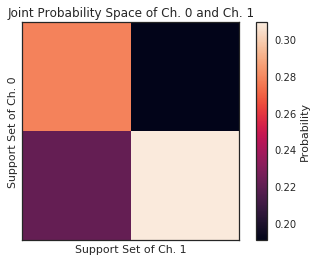

In [181]:
#Pretty colors are always nice. 
plt.imshow(M)
plt.ylabel("Support Set of Ch. 0")
plt.xlabel("Support Set of Ch. 1")
plt.yticks([])
plt.xticks([])
plt.colorbar(label="Probability")
plt.title("Joint Probability Space of Ch. 0 and Ch. 1")

In [160]:
#Note that summing the rows or columns of M gives us back our probability distributions 
#for a single channel. 

print(np.sum(M, axis=1)) #Because numpy axes are a mindf*ck, axis=1 gives you Ch. 0 and vice versa.
print(probs_0)

[0.46916667 0.53083333]
{1: 0.5308333333333334, 0: 0.4691666666666667}


In [161]:
#Now that we have out joint probability matrix, we can ask something interesting:
#Does P(X,Y) = P(X)P(Y)?
#To do that, we make a new matrix, N, and multiply together the marginal probabilities taken from our dicts.
#We then compare M with N

N = np.zeros((len(C0), len(C1)))
for i in C0.keys():
    for j in C1.keys():
        N[i][j] = probs_0[i]*probs_1[j]

print("Joint Probability Matrix")
print(M)
print("")
print("Independent Probability Matrix")
print(N)

Joint Probability Matrix
[[0.27833333 0.19083333]
 [0.22166667 0.30916667]]

Independent Probability Matrix
[[0.23458333 0.23458333]
 [0.26541667 0.26541667]]


We'll leave it to future discussion to figure out what, exactly, is the optimal way to compare these, but if you think about it, you might find yourself stumbling on the Mutual Information function a little early.  

In [167]:
#Finally, for a given channel, we can look at the surprise associated with each event:

surprise_0 = {key : np.log2(1/probs_0[key]) for key in probs_0.keys()}
print("Surprise per Outcome:", surprise_0)

Surprise per Outcome: {1: 0.9136691282395805, 0: 1.0918275784156513}


In [175]:
#We end by asking: "what is the expected surprise?" As time runs on, on average, how surprised are you by 
#the current state of Channel 0?
#Recal that the expected value of X = sum(P(X=x)*f(X=x)).
#For surprise, where S(x) = log2(1/P(X=x)), we get:

#H(X) = sum(P(X=x)*log2(1/P(X=x)) (some of you should be grinning right now).

#Well call "expected surprise" H(Ch.0).

H = sum({probs_0[key] * surprise_0[key] for key in probs_0.keys()})
print("Expected surprise:", H)

Expected surprise: 0.9972551344471869


And I think we'll end there.

Next time, we'll try and dig into what "expectd surprise" actually means in the real world. 